<a href="https://colab.research.google.com/github/Asthavaish/EDA-on-Aerofit-Data/blob/main/Aerofit_Business_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df= pd.read_csv('/content/drive/MyDrive/Aerofit.csv')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [4]:
df.shape

(180, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [6]:
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

## **No missing values in dataset**

In [7]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [8]:
df['Product'].value_counts(normalize=True)

KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: Product, dtype: float64

<ipython-input-23-4b22959432de>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<Axes: >

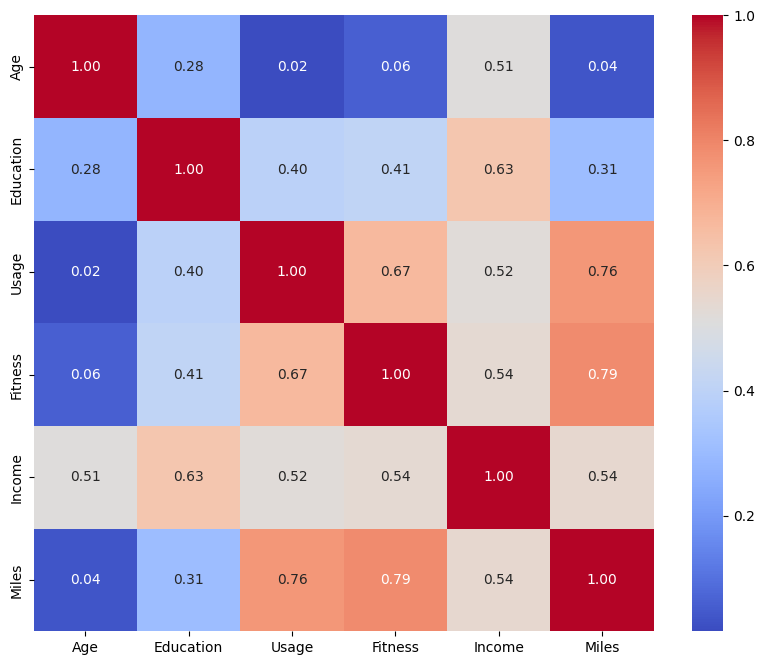

In [23]:
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 10})

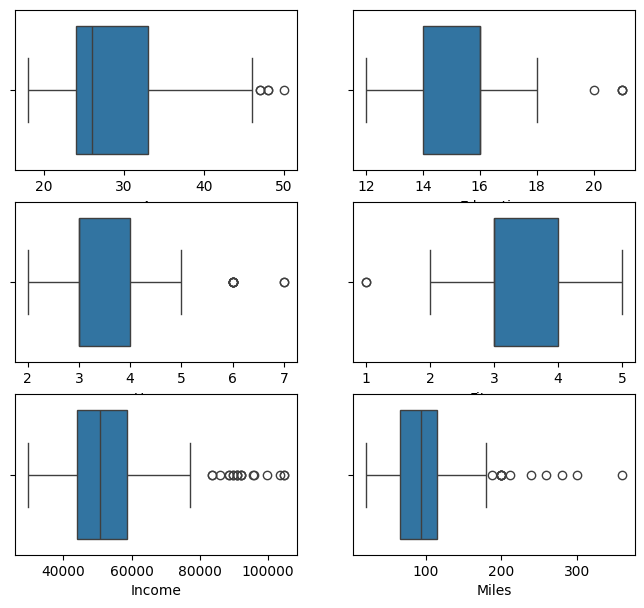

In [28]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(8, 5))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=df, x="Age", orient='h', ax=axis[0,0])
sns.boxplot(data=df, x="Education", orient='h', ax=axis[0,1])
sns.boxplot(data=df, x="Usage", orient='h', ax=axis[1,0])
sns.boxplot(data=df, x="Fitness", orient='h', ax=axis[1,1])
sns.boxplot(data=df, x="Income", orient='h', ax=axis[2,0])
sns.boxplot(data=df, x="Miles", orient='h', ax=axis[2,1])
plt.show()



*  Age, Education and Usage are having very few outliers.

*  While Income and Miles are having more outliers.




## **KP281 is the most used Product**






In [10]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


<Axes: xlabel='Income', ylabel='Age'>

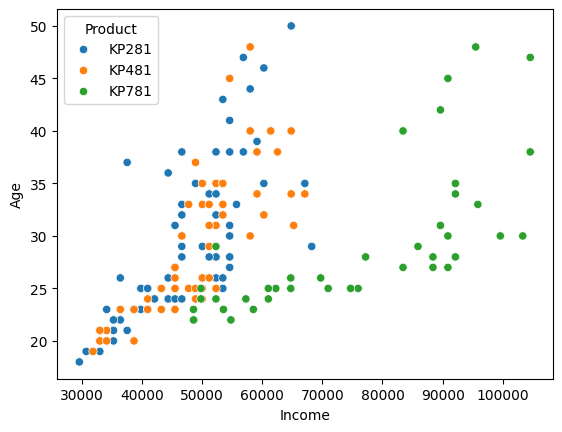

In [11]:
sns.scatterplot(x='Income', y='Age',hue='Product', data=df)

<Axes: xlabel='Product', ylabel='Age'>

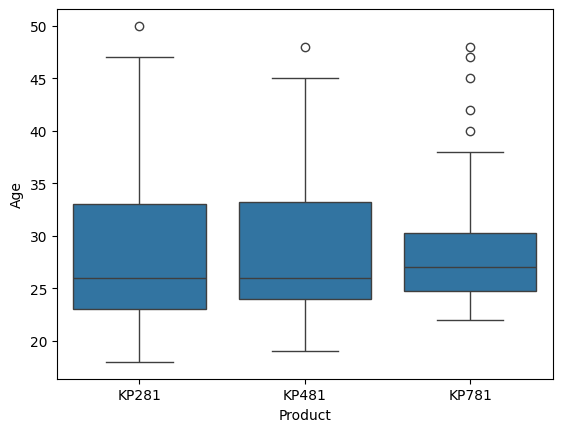

In [12]:
sns.boxplot(x="Product",y="Age", data=df)

# **Median Age for all three Products is approximately same.**


In [13]:
df['Age'].value_counts()

25    25
23    18
24    12
26    12
28     9
35     8
33     8
30     7
38     7
21     7
22     7
27     7
31     6
34     6
29     6
20     5
40     5
32     4
19     4
48     2
37     2
45     2
47     2
46     1
50     1
18     1
44     1
43     1
41     1
39     1
36     1
42     1
Name: Age, dtype: int64

<Axes: xlabel='Age', ylabel='count'>

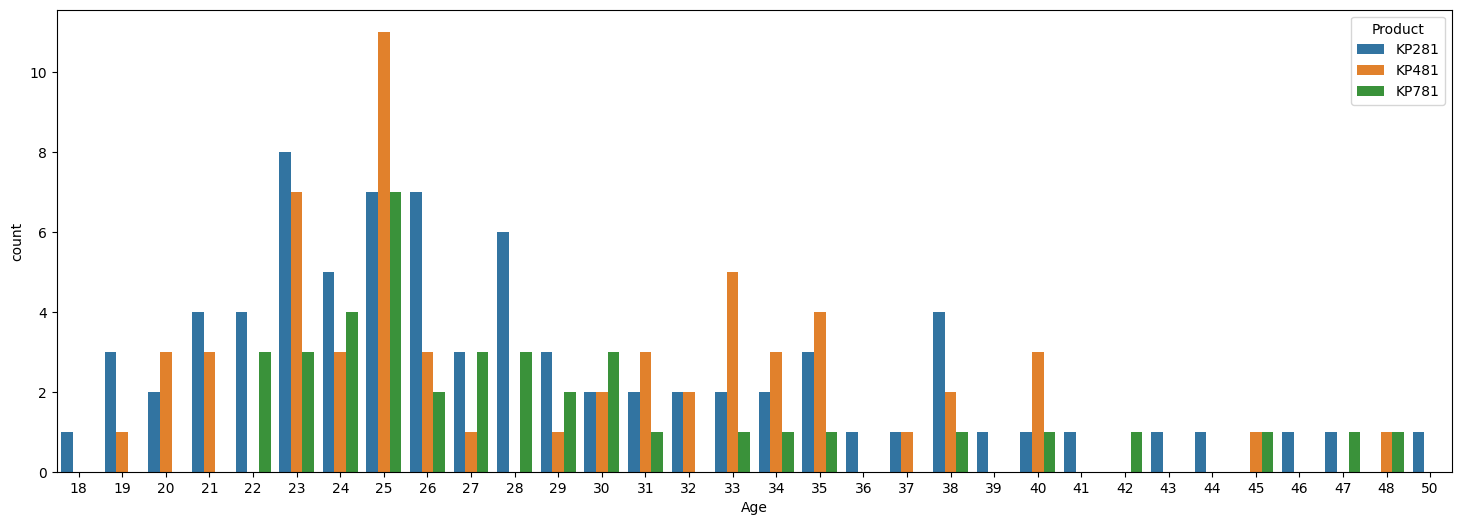

In [14]:
plt.figure(figsize=(18, 6))
sns.countplot(x='Age', hue='Product', data=df)

## **People of Age 20, 25, 33-35 and 40 preferred KP781**
## **Maximum number of treadmills are owned by people in Age group 23-26**


<Axes: xlabel='Income', ylabel='Miles'>

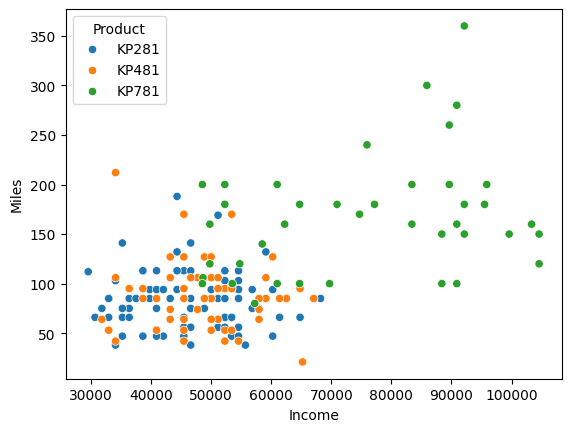

In [15]:
sns.scatterplot(x='Income',y='Miles',hue='Product',data=df)

## **People with High Income(60000 and more) prefer KP781.**
## **People running higher Miles have KP781.**

<Axes: xlabel='Product', ylabel='count'>

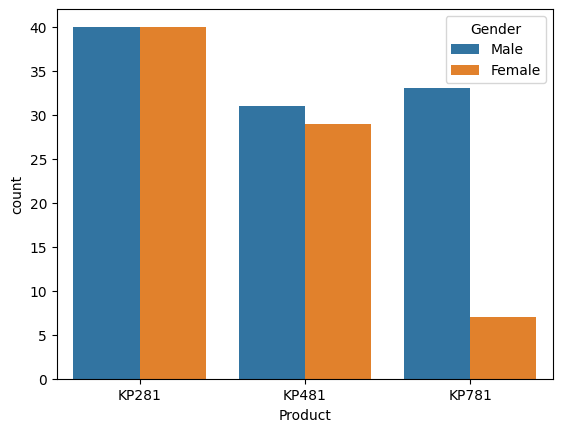

In [16]:
sns.countplot(x='Product',hue='Gender',data=df)

# **Vey few Females have KP781 compared to Males.**

In [17]:
df['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

<Axes: xlabel='Usage', ylabel='count'>

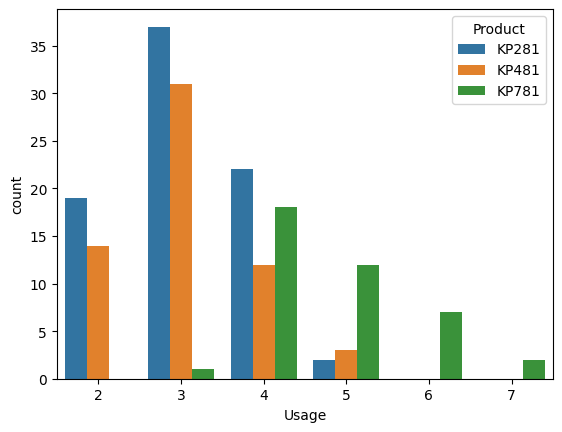

In [18]:
sns.countplot(x='Usage',hue='Product',data=df)

## **People with higher Usage(more than 4 times a week) prefer KP781.**
## **People with Usage 2 times a week did not prefer KP781 at all**

<Axes: xlabel='Fitness', ylabel='count'>

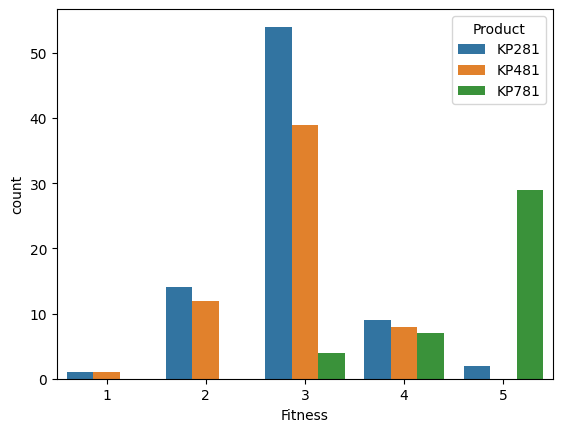

In [19]:
sns.countplot(x='Fitness',hue='Product',data=df)

## **People with Fitness rating 5 preferred KP781 only**
## **People with lower Fitness rating(3 or less) prefer KP481 AND KP281**

In [20]:
df['Education'].value_counts(normalize = True)*100

16    47.222222
14    30.555556
18    12.777778
15     2.777778
13     2.777778
12     1.666667
21     1.666667
20     0.555556
Name: Education, dtype: float64

<Axes: xlabel='Education', ylabel='count'>

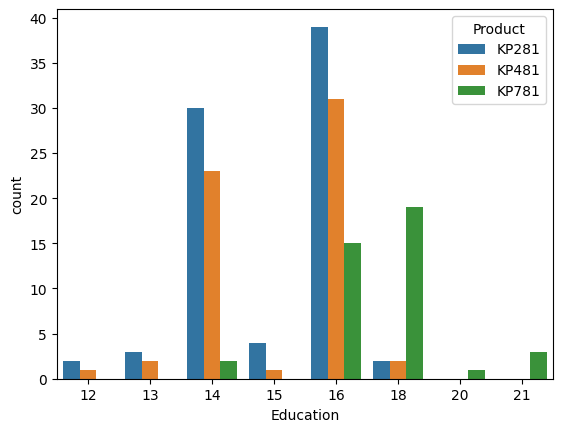

In [21]:
sns.countplot(x='Education',hue='Product',data=df)

# **Most people having treadmill have Education of 16 years**

# **INSIGHTS**

**1. KP281 Emerges as the Most Popular Product:**
`KP281 stands out as the preferred choice among customers compared to other products in the dataset.`

**2. Consistent Median Age Across All Products:**
`The median age remains relatively consistent across all three products, indicating a similar target demographic for each.`

**3.Distinct Age Preferences for KP781:**
`Individuals aged 20, 25, 33-35, and 40 exhibit a notable preference for KP781 over other products.`

**4. Peak Treadmill Ownership Among Ages 23-26:**
`The age group of 23-26 demonstrates the highest ownership of treadmills among all demographics.`

**5. High-Income Individuals Favor KP781:**
`Customers with a higher income, specifically $60,000 or more, show a preference for KP781.`

**6. KP781 Attracts High-Mileage Runners:**
`KP781 is particularly favored by individuals who engage in extensive running activities, as indicated by their higher mileage.`

**7. Gender Disparity in KP781 Ownership:**
`There exists a notable gender gap in the ownership of KP781, with fewer females compared to males.`

**8. Preference for KP781 Among Frequent Users:**
`Customers who utilize the product more frequently, exceeding four times a week, tend to favor KP781.`

**9. Low Usage Frequency Correlates with Disinterest in KP781:**
`Individuals who use the product only twice a week show little to no preference for KP781.`

**10. Exclusive Preference for KP781 Among Highest Fitness Ratings:**
`Individuals with the highest fitness rating exclusively prefer KP781, suggesting strong alignment with their fitness goals.`

**11. KP481 and KP281 Preferred by Lower Fitness Ratings:**
`Products such as KP481 and KP281 are favored by individuals with lower fitness ratings (3 or less), possibly indicating suitability for beginners or casual users.`

**12. Treadmill Ownership Prevalent Among Those with 16 Years of Education:**
`There is a notable association between treadmill ownership and individuals with 16 years of education, highlighting a potential target market for marketing efforts.`



# **Recommendations:**

**1. Focus on Promoting KP281:** Since KP281 emerges as the most popular product, the company should consider allocating more resources towards its promotion and marketing efforts. This could include targeted advertising campaigns and promotional offers to attract more customers.

**2. Target Specific Age Groups:** Identify and target specific age groups that show a distinct preference for certain products. For example, individuals aged 20, 25, 33-35, and 40 exhibit a notable preference for KP781. Tailor marketing strategies to effectively reach and engage these age demographics.

**3. Gender-Specific Marketing:** Given the gender disparity in KP781 ownership, consider gender-specific marketing strategies to appeal to both male and female customers. Understand the unique preferences and needs of each gender and tailor product messaging accordingly.

**4. Promote High-Mileage Features of KP781:** Highlight the high-mileage features of KP781 to attract individuals who engage in extensive running activities. Emphasize the durability and performance of the product for long-distance runners.

**5. Target High-Income Individuals:** Since high-income individuals show a preference for KP781, focus on targeting this demographic through upscale marketing channels and premium product features. Position KP781 as a high-quality, premium option for fitness enthusiasts.

**6. Enhance User Experience for Frequent Users:** For customers who use the product frequently, consider introducing loyalty programs, exclusive offers, and personalized experiences to enhance their satisfaction and loyalty towards the brand.

**7. Expand Product Line Based on Fitness Ratings:** Develop new products or variants tailored to different fitness levels. For example, introduce beginner-friendly options targeting individuals with lower fitness ratings (e.g., KP481 and KP281) and advanced options for those with higher fitness ratings (e.g., KP781).

**8. Invest in Education-Based Marketing:** Since treadmill ownership is prevalent among individuals with 16 years of education, consider educational marketing campaigns targeting this demographic. Provide informative content highlighting the health benefits of using treadmills and how they contribute to overall fitness and well-being.
